# Carregamento da Base

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Carregar a base e visualizar primeiras linhas
df1 = pd.read_csv('bank.csv')  #header=-1 indica que não há linha de header
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
#dimnesões da base
df1.shape

(11162, 17)

# Converte atributos categóricos em binário

In [4]:
#!pip install category-encoders

In [5]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [6]:
categorical_columns = df1.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns
categorical_columns = categorical_columns[categorical_columns != 'deposit']
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [8]:
import category_encoders as ce
encoder = ce.BinaryEncoder()
df_binary = encoder.fit_transform(df1.loc[:,categorical_columns])
df_binary.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,default_0,...,loan_1,contact_0,contact_1,month_0,month_1,month_2,month_3,poutcome_0,poutcome_1,poutcome_2
0,0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
3,0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,0,1


# Divisão em treino e teste

In [9]:
int_columns = df1.select_dtypes(include=['int'])
int_columns = int_columns.columns.values
columns = np.append(int_columns, 'deposit')
columns

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit'], dtype=object)

In [10]:
df1 = pd.concat([df_binary, df1.loc[:,columns]], axis=1)
df1.head()

,job_0,job_1,job_2,job_3,marital_0,marital_1,education_0,education_1,education_2,default_0,...,poutcome_1,poutcome_2,age,balance,day,duration,campaign,pdays,previous,deposit
0,0,0,0,1,0,1,0,0,1,0,...,0,1,59,2343,5,1042,1,-1,0,yes
1,0,0,0,1,0,1,0,0,1,0,...,0,1,56,45,5,1467,1,-1,0,yes
2,0,0,1,0,0,1,0,0,1,0,...,0,1,41,1270,5,1389,1,-1,0,yes
3,0,0,1,1,0,1,0,0,1,0,...,0,1,55,2476,5,579,1,-1,0,yes
4,0,0,0,1,0,1,0,1,0,0,...,0,1,54,184,5,673,2,-1,0,yes


In [11]:
import random
np.random.seed(1) #semente inicial
nlinhas = df1.shape[0]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,'job_0':'previous'], df1.loc[:,'deposit'], test_size=0.2)

In [13]:
y_test.value_counts()

no     1165
yes    1068
Name: deposit, dtype: int64

# Normalização

In [14]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)

In [15]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized = preprocessParams.transform(x_test)

# Treinamento da Rede Neural

In [16]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tensorflow/l

In [17]:
x_train.shape

(8929, 31)

In [18]:
RN = Sequential()
RN.add(Dense(22,input_shape = X_train_normalized.shape[1:], activation = 'sigmoid'))
RN.add(Dense(10, activation = 'sigmoid'))
RN.add(Dense(2,activation = 'sigmoid'))
RN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 22)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                230       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Transformação Dummy
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(pd.DataFrame(y_train))

y_train = encoder.transform(pd.DataFrame(y_train)).toarray()
y_test = encoder.transform(pd.DataFrame(y_test)).toarray()

In [20]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [21]:
RN.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
history = RN.fit(X_train_normalized,y_train, epochs = 100, validation_split=0.2) 

#Testar rede
score = RN.evaluate(X_test_normalized, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Train on 7143 samples, validate on 1786 samples
Epoch 1/100
7143/7143 [==============================] - 0s 66us/step - loss: 0.2897 - accuracy: 0.4767 - val_loss: 0.2755 - val_accuracy: 0.4563
Epoch 2/100
7143/7143 [==============================] - 0s 47us/step - loss: 0.2656 - accuracy: 0.4775 - val_loss: 0.2583 - val_accuracy: 0.4871
Epoch 3/100
7143/7143 [==============================] - 0s 47us/step - loss: 0.2550 - accuracy: 0.4885 - val_loss: 0.2516 - val_accuracy: 0.5280
Epoch 4/100
7143/7143 [==============================] - 0s 47us/step - loss: 0.2512 - accuracy: 0.5085 - val_loss: 0.2490 - val_accuracy: 0.5325
Epoch 5/100
7143/7143 [==============================] - 0s 46us/step - loss: 0.2497 - accuracy: 0.5101 - val_loss: 0.2478 - val_accuracy: 0.5336
Epoch 6/100
7143/7143 [==============================] - 0s 47us/step - loss: 0.2489 - accuracy: 0.5190 - val_loss: 0.2471 - val_accuracy: 0.5426
Epoch 7/100
7143/7143 [==============================] - 0s 48us/step - los

Epoch 55/100
7143/7143 [==============================] - 0s 45us/step - loss: 0.1993 - accuracy: 0.7409 - val_loss: 0.1986 - val_accuracy: 0.7408
Epoch 56/100
7143/7143 [==============================] - 0s 44us/step - loss: 0.1977 - accuracy: 0.7430 - val_loss: 0.1971 - val_accuracy: 0.7441
Epoch 57/100
7143/7143 [==============================] - 0s 44us/step - loss: 0.1960 - accuracy: 0.7439 - val_loss: 0.1955 - val_accuracy: 0.7452
Epoch 58/100
7143/7143 [==============================] - 0s 44us/step - loss: 0.1944 - accuracy: 0.7453 - val_loss: 0.1940 - val_accuracy: 0.7486
Epoch 59/100
7143/7143 [==============================] - 0s 44us/step - loss: 0.1928 - accuracy: 0.7500 - val_loss: 0.1924 - val_accuracy: 0.7492
Epoch 60/100
7143/7143 [==============================] - 0s 44us/step - loss: 0.1911 - accuracy: 0.7505 - val_loss: 0.1909 - val_accuracy: 0.7497
Epoch 61/100
7143/7143 [==============================] - 0s 44us/step - loss: 0.1895 - accuracy: 0.7525 - val_loss: 0

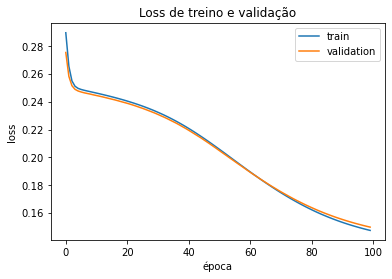

In [22]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss de treino e validação')
plt.ylabel('loss')
plt.xlabel('época')
plt.legend();

# Avaliando resultados

In [23]:
# Vamos testar a rede
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = np.argmax(y_test, axis=1)

In [24]:
#matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes) 
confMatrix

array([[958, 248],
       [207, 820]])

In [25]:
# Matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes)
pd.DataFrame(confMatrix, 
             index=['Pred No', 'Pred Yes'], 
             columns=['Real No', 'Real Yes'],) #matriz de confusão

,Real No,Real Yes
Pred No,958,248
Pred Yes,207,820


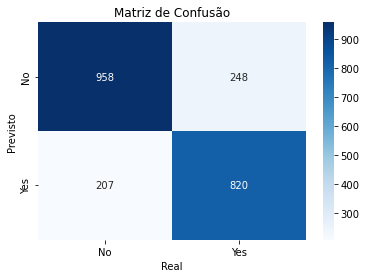

In [26]:
import seaborn as sns
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.Blues)
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['No', 'Yes']) 
ax.yaxis.set_ticklabels(['No', 'Yes'])
plt.show()